# This is the notebook explaining the outputs and analysis of the Flint-inspired Agent-Based Model

The model has 6 versions:
- a parameter sweep on model without organizing and static trust
- a model that adds in organizing behavior to the simple version
- a model that adds dynamic trust to the organizing behavior
- the first simple model wtih media connections added
- a model that has static trust, media connections, and organizing behavior
- a model that has dynamic trust, media connections, and organizing behavior

In [14]:
#install packages

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import re
import array as arr
from scipy.stats import pearsonr

## Google trends data interpretation

[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 4, 3, 2, 9, 23, 100, 57, 38, 27, 14, 12, 13, 19, 15, 9, 7, 7, 7, 11, 9, 9, 6, 5, 3, 3, 3, 3, 3, 3]


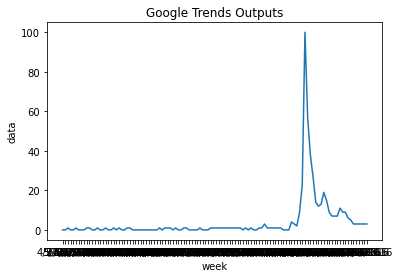

In [18]:
google_trends = pd.read_csv('google-trends.csv')
google_trends.columns = ['week', 'data']
google_data = google_trends['data'].to_list()
print(data)
sns.lineplot(data=google_trends, x='week', y='data')
plt.title('Google Trends Outputs')
plt.show()

## Model 1: influence model

### Task 1: Interpret outcomes from csv output 

In [13]:
#load in the csv file
infl_mod = pd.read_csv('influence-model-sweep.csv')
infl_mod.columns = ['run', 'n', 'spread-type', 'simple-spread-chance', 'graph-type', 'ba-m', 'citizen-media-influence',
                  'citizen-citizen-influence', 'flint-community-size','repetition', 'data']

In [20]:
#process the csv and add columns to fill with metrics later

#short list represents both the shortened list to match the google trends data (114 weeks) and the processed data so that it
#is scaled out of 100 to better align with google data
infl_mod["short list"]=None
#threshold is a binary value representing whether or not the critical mass of the population has been reached (represented by
# 70%)
infl_mod['threshold'] = None
#peak-time is the time at which the peak will occur
infl_mod['peak-time']=None
#total spread is how many agents were reached in sum 
infl_mod['total-spread']=None
#2-week-spread is the largest increase in new agents over a two-week period
infl_mod['2-week-spread']=None
#total-error is the total error
infl_mod['total-error']=None
#r is caluclated as pearson's r
infl_mod['r']= None


'''The three functions below are needed for data processing'''

def convertdata(data):
    sdata = data.strip(' ')
    ndata = nlogo_parse_chunk(sdata)
    n2data = [elem.replace('.', '') for elem in ndata]
    list=[]
    for x in n2data:
        list.append(x.replace("\r\n", ""))
    list = [i for i in list if i]
    return list

def nlogo_parse_chunk(chunk):
    chunk = chunk.strip().replace('"','')
    if chunk.count('[') > 1 and chunk[0] == '[':
        return nlogo_mixed_list_to_dict_rec(chunk[chunk.index('['):].strip())
    elif chunk.count('[') > 1 or chunk[0] != '[':
        return { chunk[0:chunk.index('[')].strip(): nlogo_mixed_list_to_dict_rec(chunk[chunk.index('['):].strip()) }

    pieces = chunk.strip().replace('[','').replace(']','').split(' ')
    if len(pieces) == 2:
        return { pieces[0]: pieces[1] }
    else:
        return pieces

def convert_to_int(data):
    for i in range(0, len(data)):
        data[i] = int(data[i])
    return data



'''This section goes through each simulation to update the dataframe with usable data and the metrics set up above'''
for i in range(0,infl_mod.shape[0]):
    thresh=0
    error=0
    
    #set cutoff to the number of agents that need to hear about Flint to be considered a success
    cutoff=210
    
    run1 = infl_mod["data"].iloc[i]
    finallist = convertdata(run1)
    int_data = convert_to_int(finallist)
    short_list=int_data[: 114]
    scaled_short_list=[]
        #code below scales data from 0-100 to match google trends
    if max(short_list)>= 1:
        for k in range(0, len(short_list)):
            val=(short_list[k]/max(short_list))*100
            scaled_short_list.append(val)
        time_of_peak=short_list.index(max(short_list))
    else:
        for k in range(0, len(short_list)):
            val = (short_list[k] / 1) * 100
            scaled_short_list.append(val)
    infl_mod['short list'].iloc[i] = scaled_short_list
    for h in range(0, len(scaled_short_list)):
        thresh=thresh+int_data[h]
        error_addition=abs(scaled_short_list[h]-google_data[h])
        error=error+error_addition
    if thresh >= cutoff:
        infl_mod['threshold'].iloc[i] = 1
    else:
        infl_mod['threshold'].iloc[i] = 0
    infl_mod['total-spread'] = thresh
    corr_coef=pearsonr(google_data,scaled_short_list)
    corr_val=corr_coef[0]
    infl_mod['r'].iloc[i] = corr_val
    infl_mod["total-error"].iloc[i]=error
    infl_mod[]
        #2-week spread
        #peak-time
        
print(infl_mod)

#####NEED TO CORRECT- THRESHOLD NEEDS TO BE COMPLETED ON NOT SCALED DATA
 

     

C:\Users\cknox02\Anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


         run    n spread-type  simple-spread-chance       graph-type  ba-m  \
0          0  300      simple                  0.01  barabasi-albert     3   
1          1  300      simple                  0.01  barabasi-albert     3   
2          2  300      simple                  0.01  barabasi-albert     3   
3          3  300      simple                  0.01  barabasi-albert     3   
4          4  300      simple                  0.01  barabasi-albert     3   
...      ...  ...         ...                   ...              ...   ...   
10790  10790  300      simple                  0.75  barabasi-albert    10   
10791  10791  300      simple                  0.75  barabasi-albert    10   
10792  10792  300      simple                  0.75  barabasi-albert    10   
10793  10793  300      simple                  0.75  barabasi-albert    10   
10794  10794  300      simple                  0.75  barabasi-albert    10   

       citizen-media-influence  citizen-citizen-influence  \
0 

In [ ]:
   #create pandas dataframe for each over threshold

    #need to sort these by threshold- also no transformation is happening here
    #test a few?
    df_new = df_new[df_new["threshold"] == 1]
    df_new.to_csv("infl-model-sweep-eval.csv")
    sns.scatterplot(data=df_new, x='rmse', y='corr_coef')
    plt.title("Influence Model Sweep Analysis")
    plt.xlabel("RMSE")
    plt.ylabel("Corr_coef")
    plt.show()

    min_RMSE=df_new[df_new.rmse == df_new.rmse.min()]
    print('min rmse:',min_RMSE)
    run = min_RMSE["short list"].tolist()
    run=run[0]
    time_list=[]
    for i in range(0, 114):
        time_list.append(i)
    print(time_list)
    print(run)
    print(type(run))
    plt.plot(time_list, run, label='simulation')
    plt.plot(time_list, google_trends_data, label= 'gooogle trends')
    plt.legend()
    plt.title("Min RMSE Influence Model_Sweep_Analysis")
    plt.show()

    max_cc = df_new[df_new.corr_coef == df_new.corr_coef.max()]
    print('max cc:', max_cc)
    run = max_cc["short list"].tolist()
    run = run[0]
    time_list = []
    for i in range(0, 114):
        time_list.append(i)
    print(time_list)
    print(run)
    print(type(run))
    plt.plot(time_list, run, label='simulation')
    plt.plot(time_list, google_trends_data, label='google trends')
    plt.legend()
    plt.title("Max CC Influence Model_Sweep_Analysis")
    plt.show()

    max_RMSE=df_new[df_new.rmse == df_new.rmse.max()]
    print('min rmse:',max_RMSE)
    run = max_RMSE["short list"].tolist()
    run=run[0]
    time_list=[]
    for i in range(0, 114):
        time_list.append(i)
    print(time_list)
    print(run)
    print(type(run))
    plt.plot(time_list, run, label='simulation')
    plt.plot(time_list, google_trends_data, label= 'gooogle trends')
    plt.legend()
    plt.title("Max RMSE Influence Model_Sweep_Analysis")
    plt.show()

    print("average RMSE:", df_new.rmse.mean())
    print("average corr_coef:", df_new.corr_coef.mean())
    print("average total_error:", df_new.total_error.mean())
